In [60]:
#imports
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare the data

In [61]:
#variables to contain paths to data sets
train_path = 'dog_cat/train'
valid_path = 'dog_cat/valid'
test_path = 'dog_cat/test'

In [62]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224), classes = ['dog', 'cat'], batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size = (224,224), classes = ['dog', 'cat'], batch_size = 4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224), classes = ['dog', 'cat'], batch_size = 8)

Found 60 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [63]:
#plot images with labels in jupyter notebook
def plot(ims, figsize = (12,6), rows = 1, interp = False, titles = None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')

In [64]:
imgs, labels = next(train_batches)

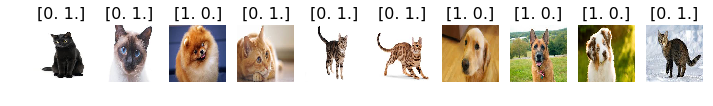

In [65]:
plot(imgs, titles = labels)

## Build the CNN

In [66]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(2, activation = 'softmax'))

In [67]:
#compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [68]:
#train the model
model.fit_generator(train_batches, steps_per_epoch = 6, validation_data = valid_batches, validation_steps = 4, epochs = 5, verbose =1)

Epoch 1/5
6/6 [==============================] - 13s 2s/step - loss: 8.0728 - acc: 0.4833 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
6/6 [==============================] - 6s 932ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
6/6 [==============================] - 6s 949ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
6/6 [==============================] - 6s 961ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
6/6 [==============================] - 6s 960ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


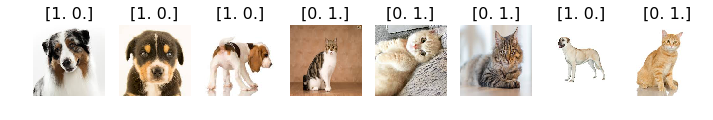

In [69]:
#making predictions
test_imgs, test_labels = next(test_batches)
plot(test_imgs, titles = test_labels)

In [70]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 0., 0., 0., 1., 0.], dtype=float32)

In [71]:
predictions = model.predict_generator(test_batches, steps = 1, verbose = 1)

1/1 [==============================] - 2s 2s/step


In [72]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [73]:
predictions = predictions[:,0]

In [74]:
predictions

array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [75]:
cm = confusion_matrix(test_labels, predictions)

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 4]
 [0 4]]


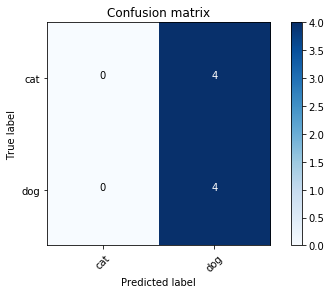

In [77]:
plot_confusion_matrix(cm, ['cat','dog'])